In [1]:
from astropy.io import fits
from photutils import DAOStarFinder
import numpy as np
from photutils import datasets
from astropy.stats import mad_std
import matplotlib.pyplot as plt
from photutils import aperture_photometry, CircularAperture, CircularAnnulus

%matplotlib inline


In [2]:
image = fits.getdata('arcsat2019/42016/SA101_I_20160421_035141.fits').astype(float)
bias1 = fits.getdata('arcsat2019/42016/Bias_B1_20160421_013211.fits').astype(float)
bias2 = fits.getdata('arcsat2019/42016/Bias_B1_20160421_013234.fits').astype(float)
bias3 = fits.getdata('arcsat2019/42016/Bias_B1_20160421_013234.fits').astype(float)

data_file = "./Data/bsg01.fits"

my_fits_file = fits.open(data_file)

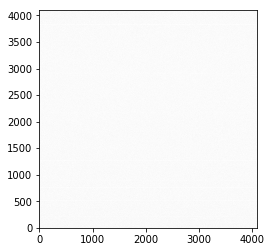

In [3]:
master_bias = bias1 + bias2 + bias3

plt.imshow(master_bias, cmap='gray_r', origin='lower');

In [4]:
np.mean(bias1)

1213.894760787487

In [5]:
np.mean(bias2)

1213.7817489504814

In [6]:
np.mean(bias3)

1213.7817489504814

In [7]:
np.mean(master_bias)

3641.45825868845

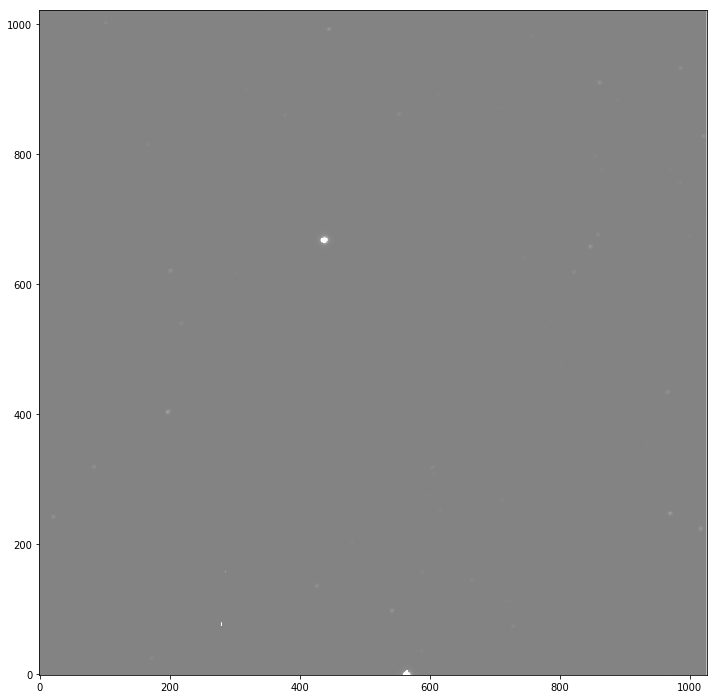

In [8]:
wolf_flat1 = fits.getdata('quadRU.fits').astype(float)


fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(wolf_flat1, origin='lower', cmap=plt.cm.gray);

In [28]:
image = fits.getdata('quadRU.fits').astype(np.int32)
bkg_sigma = mad_std(image)    
daofind = DAOStarFinder(fwhm=4., threshold=20.*bkg_sigma)    
sources = daofind(image)    
for col in sources.colnames:  
    sources[col].info.format = '%.8g'
print(sources)    

 id xcentroid ycentroid sharpness  ... sky  peak    flux       mag     
--- --------- --------- ---------- ... --- ----- --------- ------------
  1 561.29745 1.0577597 0.31775692 ...   0 61405 151.95257   -5.4542701
  2 1025.5082 1.5346852 0.44407107 ...   0 29365 82.931784   -4.7968025
  3 565.10978 4.1101608 0.24448961 ...   0 60625 109.37291   -5.0972744
  4 172.86668 24.843873 0.39618401 ...   0  3875 6.3933133    -2.014315
  5 587.59336 36.751404 0.43125396 ...   0  2162 3.0452614   -1.2090615
  6 854.37157 68.576935 0.41780443 ...   0   882 1.0453019 -0.048104347
  7  728.4514 74.787799 0.40562366 ...   0  4082  6.293026   -1.9971488
  8 542.29632 98.763434 0.42997437 ...   0 10355 16.555113   -3.0473304
  9 145.66633 103.71618 0.42525028 ...   0  1293 1.7338126  -0.59750536
 10 726.80948 113.30058 0.38003221 ...   0  1037 1.1976614  -0.19583513
...       ...       ...        ... ... ...   ...       ...          ...
 75 136.25287 914.95852  0.8627011 ...   0  1355 2.2776781  -0.8

In [45]:
positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAperture(positions, r=3.)    
phot_table = aperture_photometry(image, apertures)    
for col in phot_table.colnames:  
     phot_table[col].info.format = '%.8g' 
print(phot_table)  

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 561.29745 1.0577597    1240783.2
  2 1025.5082 1.5346852    292044.03
  3 565.10978 4.1101608    1496673.6
  4 172.86668 24.843873    64924.793
  5 587.59336 36.751404    38675.617
  6 854.37157 68.576935    17529.754
  7  728.4514 74.787799    71266.693
  8 542.29632 98.763434    169590.58
  9 145.66633 103.71618    23857.095
 10 726.80948 113.30058    21480.604
...       ...       ...          ...
 76 648.66764 916.73129    20861.618
 77 697.46905 921.65861    23587.144
 78  985.4673 933.08558    101158.99
 79 89.173506 981.48843    20570.611
 80 758.40619 981.66329     33512.39
 81 212.10108 987.81597    16395.921
 82 445.52837 993.16685    155666.13
 83 101.81954 1003.1319    76412.907
 84 187.41874 1005.4997    18167.766
 85 602.81886 1014.1271    18696.224
Length = 85 rows


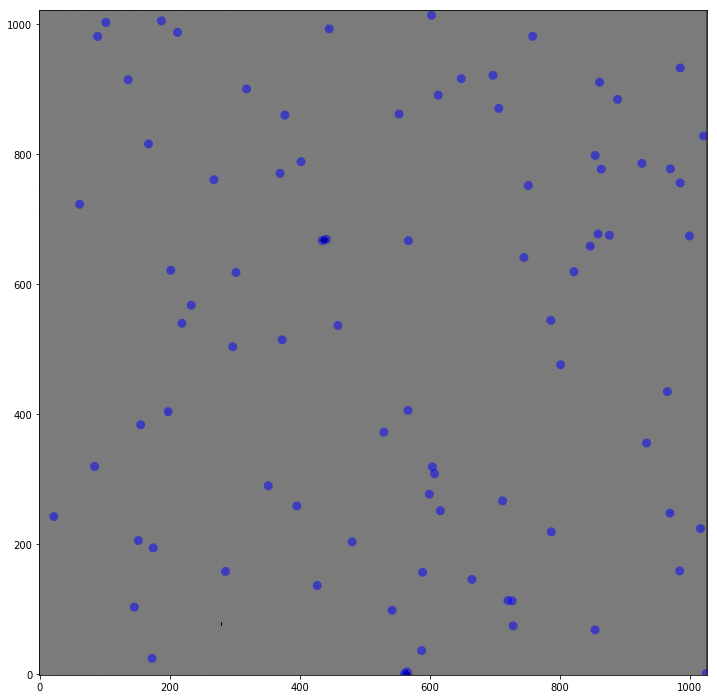

In [50]:
##image = fits.getdata('arcsat2019/SA101_I_20160421_035141.fits').astype(np.int32)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='blue', lw=5, alpha=0.5)

In [35]:
##apertures = CircularAperture(positions, r=3)
annulus_apertures = CircularAnnulus(positions, r_in=3., r_out=4.)

apers = [annulus_apertures]
phot_table1 = aperture_photometry(image, apers)
for col in phot_table1.colnames:
     phot_table1[col].info.format = '%.8g'
print(phot_table1);


 id  xcenter   ycenter  aperture_sum_0
       pix       pix                  
--- --------- --------- --------------
  1 561.29745 1.0577597      495024.68
  2 1025.5082 1.5346852        61386.5
  3 565.10978 4.1101608      762141.77
  4 172.86668 24.843873      21432.643
  5 587.59336 36.751404      14852.794
  6 854.37157 68.576935      8781.3263
  7  728.4514 74.787799      23924.406
  8 542.29632 98.763434      50888.661
  9 145.66633 103.71618      10208.392
 10 726.80948 113.30058      11684.519
...       ...       ...            ...
 76 648.66764 916.73129      9749.2413
 77 697.46905 921.65861      10592.643
 78  985.4673 933.08558      30168.017
 79 89.173506 981.48843      8850.6342
 80 758.40619 981.66329      12984.374
 81 212.10108 987.81597      7974.2346
 82 445.52837 993.16685      44117.459
 83 101.81954 1003.1319       23322.37
 84 187.41874 1005.4997      8357.8858
 85 602.81886 1014.1271      9259.4102
Length = 85 rows


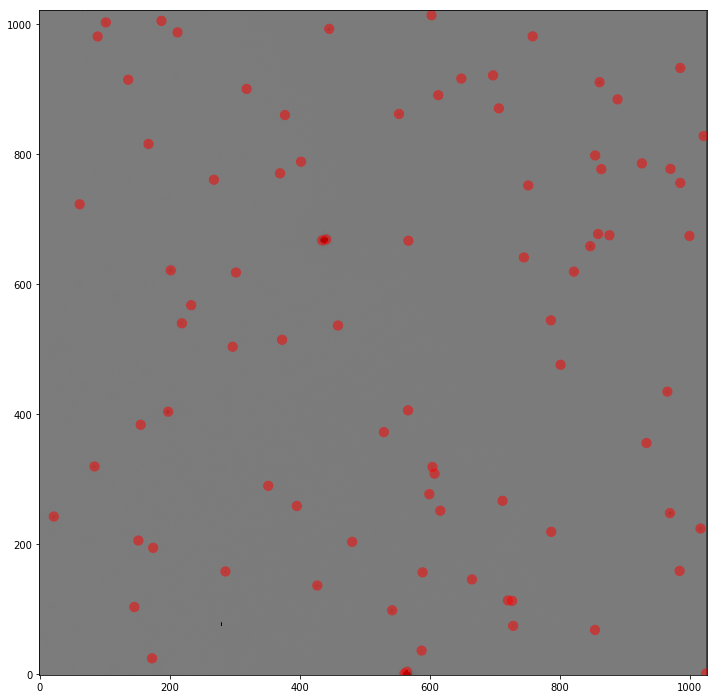

In [53]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(image, cmap='gray_r', origin='lower')
annulus_apertures.plot(color='red', lw=5, alpha=0.5)

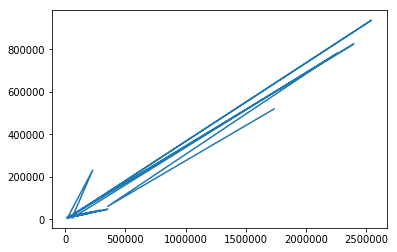

In [19]:
plt.plot(phot_table["aperture_sum"],phot_table1["aperture_sum_0"]);
